<a href="https://colab.research.google.com/github/justjstine/CCMACLRL_EXERCISES_COM232/blob/Exercise-1/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [103]:
df = pd.read_excel('trial.xlsx')
df.head()

,NAME,POSTS/ SHARES FREQUENTLY,ACTIVE,REPLIES TO COMMENTS,# OF FRIENDS,PERSONALITY
0,Dreig,1,1,1,1100,1
1,John,0,1,1,1900,1
2,Gab,0,0,1,1400,0
3,Marcus,1,1,1,787,1
4,Rovic,0,1,1,862,0


Display the summary of all the features of the dataset using `.info()`

In [104]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NAME                      99 non-null     object
 1   POSTS/ SHARES FREQUENTLY  99 non-null     int64 
 2   ACTIVE                    99 non-null     int64 
 3   REPLIES TO COMMENTS       99 non-null     int64 
 4   # OF FRIENDS              99 non-null     int64 
 5   PERSONALITY               99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [105]:
# put your answer here
df['PERSONALITY'].value_counts()

,count
PERSONALITY,
1,65
0,34


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

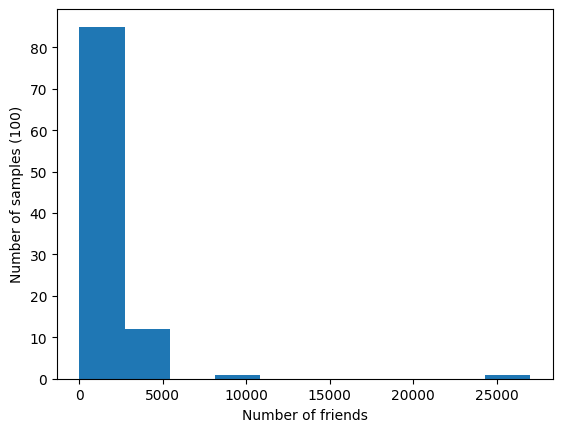

In [106]:
# put your answer here
plt.hist(df["# OF FRIENDS"])
plt.xlabel("Number of friends")
plt.ylabel("Number of samples (100)")
plt.show()


## C. Split the dataset into training and test set

In [107]:
# put your answer here
X = df.drop(columns=['NAME ', 'PERSONALITY']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [108]:
y = df['PERSONALITY'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [109]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


Display the dimensions of each variables using `.shape()`

In [110]:
# put your answer hered
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(79, 4)
(79,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [111]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [112]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [113]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

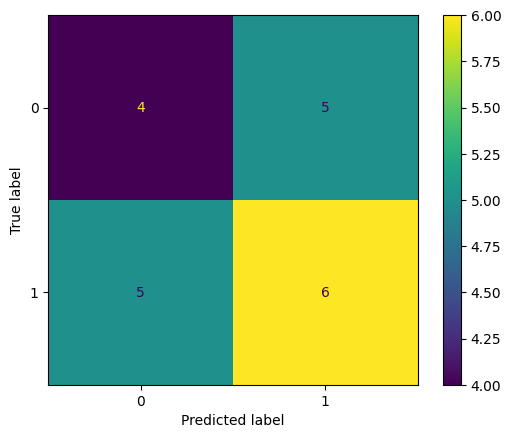

In [114]:
# put your answer here

conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [115]:
# put your answer here

metrics.accuracy_score(y_test, y_pred)

0.5

Display the precision

In [116]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.44444444 0.54545455]


Display the recall

In [117]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.44444444 0.54545455]


Display the f1-score

In [118]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.44444444 0.54545455]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [122]:
# put your answer here
knn.predict([[0, 0, 0, 100]])

array([0])